In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fft
import itertools
import japanize_matplotlib

In [215]:
# グラフの設定
fontsize_title = 20
fontsize_label = 20
max_xlin = 35

# サンプリング周波数
fs_acc = 390
fs_gyro = 390
fs_pressure = 20

In [216]:
# CSVファイルを読み込む
walk_press_file = "./logs/walk_run/Pressure.csv"
walk_acc_file = "./logs/walk_run/Accelerometer.csv"
elevator_press_file = "./logs/elevator/Pressure.csv"
elevator_acc_file = "./logs/elevator/Accelerometer.csv"

df_walk_pressure = pd.read_csv(
    walk_press_file,
    header=0,
    names=("time", "pressure")
)

df_walk_acc = pd.read_csv(
    walk_acc_file,
    header=0,
    names=("time", "x", "y", "z")
)

df_elevator_pressure = pd.read_csv(
    elevator_press_file,
    header=0,
    names=("time", "pressure")
)

df_elevator_acc = pd.read_csv(
    elevator_acc_file,
    header=0,
    names=("time", "x", "y", "z")
)

# 加速度から重力加速度を除去
df_walk_acc["x"] = df_walk_acc["x"] - df_walk_acc["x"].mean()
df_walk_acc["y"] = df_walk_acc["y"] - df_walk_acc["y"].mean()
df_walk_acc["z"] = df_walk_acc["z"] - df_walk_acc["z"].mean()

df_elevator_acc["x"] = df_elevator_acc["x"] - df_elevator_acc["x"].mean()
df_elevator_acc["y"] = df_elevator_acc["y"] - df_elevator_acc["y"].mean()
df_elevator_acc["z"] = df_elevator_acc["z"] - df_elevator_acc["z"].mean()


In [231]:
# 加速度のノルムを計算する
df_walk_acc['norm'] = np.linalg.norm(df_walk_acc[['x', 'y', 'z']], axis=1)
df_elevator_acc['norm'] = np.linalg.norm(df_elevator_acc[['x', 'y', 'z']], axis=1)

# 移動平均フィルターをかける
window = 20
df_walk_pressure['low'] = df_walk_pressure['pressure'].rolling(window=window).mean()
df_elevator_pressure['low'] = df_elevator_pressure['pressure'].rolling(window=window).mean()


In [218]:
def plot_acc(df, title):
  fig = plt.figure(figsize=(10, 3))
  
  plt.title(title)
  plt.xlabel('time[s]')
  plt.ylabel('accelerometer\n[m/s^2]')
  plt.plot(df['time'], df['norm'])
  plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)
  plt.xlim(0, 35)
  plt.ylim(0, 30)

  for i in range(int(df['time'].max() + 1)):
    df_part = df.query(f'{i} <= time < {i+1}')
    var = df_part['norm'].var()
    color = "blue" if var >= 0.1 else "yellow"
    plt.axvspan(i, i+1, color=color, alpha=0.2)

  plt.show()



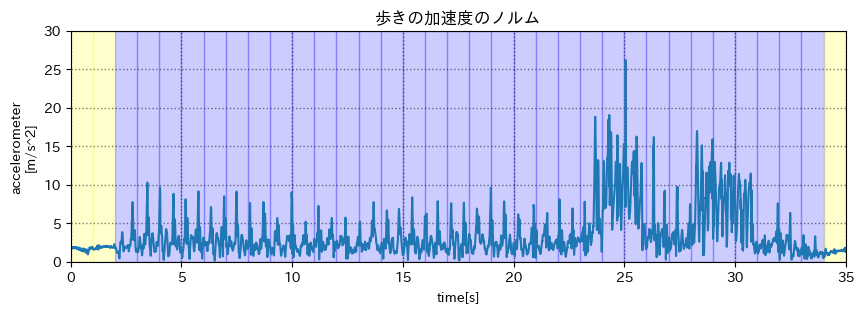

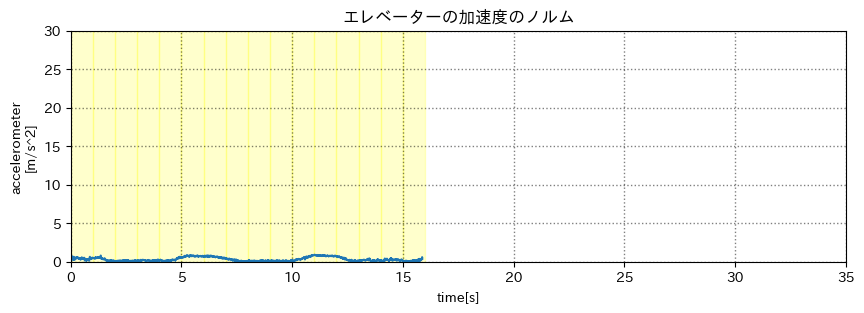

In [219]:
# 加速度
plot_acc(df_walk_acc, '歩きの加速度のノルム')
plot_acc(df_elevator_acc, 'エレベーターの加速度のノルム')


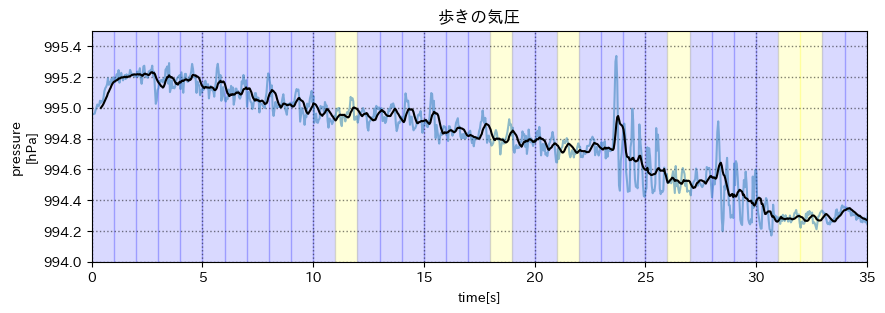

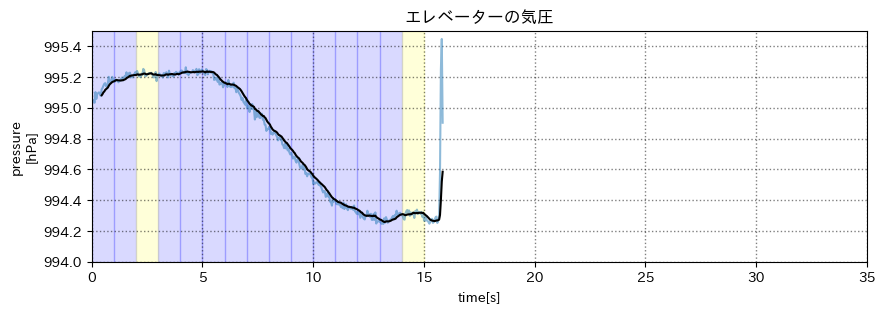

In [233]:
def plot_pressure(df, title):
  fig = plt.figure(figsize=(10, 3))
  
  plt.title(title)
  plt.xlabel('time[s]')
  plt.ylabel('pressure\n[hPa]')
  plt.plot(df['time'], df['pressure'], alpha=0.5)
  plt.plot(df['time'], df['low'], color='black')
  plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)
  plt.xlim(0, 35)
  plt.ylim(994, 995.5)

  step = 1
  for i in [i * step for i in range(int(df['time'].max() / step))]:
    df_part_a = df.query(f'{i} <= time < {i+step}')
    df_part_b = df.query(f'{i+step} <= time < {i+step*2}')

    mean_a = df_part_a['low'].mean()
    mean_b = df_part_b['low'].mean()
  
    color = "blue" if abs(mean_a - mean_b) >= 0.014 else "yellow"
    plt.axvspan(i, i+step, color=color, alpha=0.15)

  plt.show()


# 気圧
plot_pressure(df_walk_pressure, '歩きの気圧')
plot_pressure(df_elevator_pressure, 'エレベーターの気圧')
